In [2]:
from google.colab import files
uploadedFile = files.upload()

Saving Indian_Number_plates.json to Indian_Number_plates.json


In [3]:
from google.colab import files
uploaded = files.upload()

Saving temp-num.zip to temp-num.zip


In [4]:
!apt install unzip
!unzip temp-num.zip -d tempnum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Archive:  temp-num.zip
   creating: tempnum/temp-num/
  inflating: tempnum/temp-num/0-01.png  
 extracting: tempnum/temp-num/0-02.png  
 extracting: tempnum/temp-num/0-03.png  
  inflating: tempnum/temp-num/1-01.png  
  inflating: tempnum/temp-num/1-02.png  
  inflating: tempnum/temp-num/1-03.png  
 extracting: tempnum/temp-num/2-01.png  
 extracting: tempnum/temp-num/2-02.png  
 extracting: tempnum/temp-num/2-03.png  
 extracting: tempnum/temp-num/3-01.png  
 extracting: tempnum/temp-num/3-02.png  
 extracting: tempnum/temp-num/3-03.png  
 extracting: tempnum/temp-num/4-01.png  
 extracting: tempnum/temp-num/4-02.png  
 extracting: tempnum/temp-num/4-03.png  
 extracting: tempnum/temp-num/5-01.png  
 extracting: tempnum/temp-num/5-02.png  
 extracting: tempnum/temp-num/5-03.pn

In [5]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 4s (1,256 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [0]:
import pandas as pd
import imutils
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
import shutil
import os
import io
import random
from PIL import Image
import pytesseract
import cv2
from google.colab.patches import cv2_imshow

In [0]:
import numpy as np
#from numberplates import *
from tempnum import *
import collections

files = [
    [{'name': 'car1.jpg', 'pm_thresh': 0.58, 'type': 'white'}],
    [{'name': 'car2.jpg', 'pm_thresh': 0.55, 'type': 'special', 'option':{
        'type': 'color',
        'lower_white': np.array([0,0,210], dtype=np.uint8),
        'upper_white': np.array([255,30,255], dtype=np.uint8),
        'no_bitwise': False
    }}],
    [{'name': 'car3.jpg', 'pm_thresh': 0.42, 'type': 'yellow'}],
    [{'name': 'car4.jpg', 'pm_thresh': 0.5, 'type': 'white_bg'}],
    [{'name': 'car5.jpg', 'pm_thresh': 0.15, 'type': 'yellow'}],
    [{'name': 'car6.jpg', 'pm_thresh': 0.17, 'type': 'white'}],
    [{'name': 'car7.jpg', 'pm_thresh': 0.28, 'type': 'white'}],
    [{'name': 'car8.jpg', 'pm_thresh': 0.19, 'type': 'white'}],
    [{'name': 'car9.jpg', 'pm_thresh': 0.56, 'type': 'yellow'}],
    [{'name': 'car10.jpg', 'pm_thresh': 0.40, 'type': 'white'}],
    [{'name': 'car11.jpg', 'pm_thresh': 0.40, 'type': 'special', 'option': {
        'type': 'nope',
        'no_bitwise': False
    }}],
    [{'name': 'car12.jpg', 'pm_thresh': 0.40, 'type': 'white'}],
    [{'name': 'car13.jpg', 'pm_thresh': 0.40, 'type': 'special', 'option': {
        'type': 'nope',
        'no_bitwise': False
    }}],
    [{'name': 'car14.jpg', 'pm_thresh': 0.45, 'type': 'white'}],
    [{'name': 'car15.jpg', 'pm_thresh': 0.6, 'type': 'special', 'option': {
        'type': 'color',
        'lower_white': np.array([0, 150, 150], dtype=np.uint8),
        'upper_white': np.array([40, 255, 205], dtype=np.uint8),
        'no_bitwise': False
    }}],
    [{'name': 'car16.jpg', 'pm_thresh': 0.20, 'type': 'white'}],
    [{'name': 'car17.jpg', 'pm_thresh': 0.20, 'type': 'white'}],
    [{'name': 'car18.jpg', 'pm_thresh': 0.25, 'type': 'special', 'option': {
        'type': 'color',
        'lower_white': np.array([0, 0, 0], dtype=np.uint8),
        'upper_white': np.array([180, 255, 48], dtype=np.uint8),
        'no_bitwise': True
    }}],
    [{'name': 'car19.jpg', 'pm_thresh': 0.40, 'type': 'yellow'}],
    [{'name': 'car20.jpg', 'pm_thresh': 0.33, 'type': 'yellow'}],
    [{'name': 'car21.jpg', 'pm_thresh': 0.60, 'type': 'yellow'}],
    [{'name': 'car22.jpg', 'pm_thresh': 0.50, 'type': 'white_bg'}],
    [{'name': 'car23.jpg', 'pm_thresh': 0.20, 'type': 'special', 'option': {
        'type': 'color',
        'lower_white': np.array([0, 0, 0], dtype=np.uint8),
        'upper_white': np.array([180, 255, 200], dtype=np.uint8),
        'no_bitwise': True
    }}],
    [{'name': 'car24.jpg', 'pm_thresh': 0.20, 'type': 'white'}],
    [{'name': 'car25.jpg', 'pm_thresh': 0.62, 'type': 'special', 'option': {
        'type': 'color',
        'lower_white': np.array([0,0,230], dtype=np.uint8),
        'upper_white': np.array([255,20,255], dtype=np.uint8),
        'no_bitwise': False
    }}],
    [{'name': 'car26.jpg', 'pm_thresh': 0.60, 'type': 'special', 'option': {
        'type': 'nope',
        'no_bitwise': False
    }}],
]

temp_files = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','0','1','2','3','4','5','6','7','8','9']

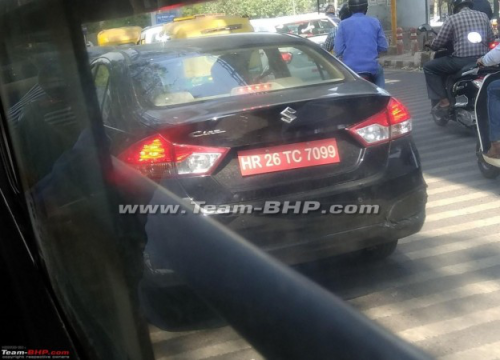

In [70]:
data = pd.read_json('Indian_Number_plates.json',lines = True)
for num in range(25,26):
  URL = data["content"][num]
  with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())
  pil_image = Image.open(f)
  frame=np.array(pil_image)
  image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
  image=imutils.resize(image,width=500)
  cv2_imshow(image)
  pil_image = Image.open(f).convert('L')
  gray=np.array(pil_image)
  cv2.imwrite('temp.jpg',gray)
  gray=imutils.resize(gray,width=500)
  gray=cv2.bilateralFilter (gray,11,17,17)

In [0]:
edged=cv2.Canny(gray,104,105)

In [0]:
 _, contours, _ = cv2.findContours( edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img1=image.copy()
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
NumberPlateCnt =None
found = False
lt, rb = [10000, 10000], [0, 0]

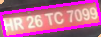

In [73]:
temp_num = [f for f in os.listdir('./tempnum') if os.path.isfile(os.path.join('./tempnum', f))]
for f in files:
        option = None
        if f[0]['type'] == 'special':
            option = f[0]['option']
        pm_thresh=f[0]['pm_thresh']
        
        
        
        _, contours, _ = cv2.findContours( edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        img1=image.copy()
        contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]
        NumberPlateCnt =None
        found = False
        lt, rb = [10000, 10000], [0, 0]       
        color=temp_files
        if color == 'white_bg':
          for c in contours:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.06 * peri, True)
            if len(approx) == 4:
              found = True
              NumberPlateCnt = approx
              break
          if found:
            cv2.drawContours(image, [NumberPlateCnt], -1, (255, 0, 255), 2)

            for point in NumberPlateCnt:
              cur_cx, cur_cy = point[0][0], point[0][1]
              if cur_cx < lt[0]: lt[0] = cur_cx
              if cur_cx > rb[0]: rb[0] = cur_cx
              if cur_cy < lt[1]: lt[1] = cur_cy
              if cur_cy > rb[1]: rb[1] = cur_cy
            cv2.circle(image, (lt[0], lt[1]), 2, (150, 200, 255), 2)
            cv2.circle(image, (rb[0], rb[1]), 2, (150, 200, 255), 2)
            crop = edged[lt[1]:rb[1], lt[0]:rb[0]]
            crop_res =image[lt[1]:rb[1], lt[0]:rb[0]]
            cv2_imshow(crop_res)
          else:
            crop = res_img.copy()
            crop_res = ori.copy()
        elif len(contours) > 0:
          hull = cv2.convexHull(contours[0])
          approx2 = cv2.approxPolyDP(hull,0.01*cv2.arcLength(hull,True),True)
          cv2.drawContours(image, [approx2], -1, (255, 0, 255), 2, lineType=8)
          for point in approx2:
            cur_cx, cur_cy = point[0][0], point[0][1]
            if cur_cx < lt[0]: lt[0] = cur_cx
            if cur_cx > rb[0]: rb[0] = cur_cx
            if cur_cy < lt[1]: lt[1] = cur_cy
            if cur_cy > rb[1]: rb[1] = cur_cy

          cv2.circle(image, (lt[0], lt[1]), 2, (150, 200, 255), 2)
          cv2.circle(image, (rb[0], rb[1]), 2, (150, 200, 255), 2)
          crop = image[lt[1]:rb[1], lt[0]:rb[0]]
          crop_res = img1[lt[1]:rb[1], lt[0]:rb[0]]
        else:
          crop = image.copy()
          crop_res = img1.copy()
     
        
        pm = {}

        method = cv2.TM_CCOEFF_NORMED
        threshold =pm_thresh
        #cw, ch = crop.shape[::-1]
        for temp in temp_num:
            highest = 0
            highest_pt = []
            for i in range(1, 4):
                temp_result = []
                t_img = cv2.imread("./temp-num/{}-0{}.png".format(temp, str(i)), 0)
                t_img = imutils.resize(t_img, height = ch-2)
                w, h = t_img.shape[::-1]

                res = cv2.matchTemplate(crop, t_img, method)
                loc = np.where( res >= threshold)
                for pt in zip(*loc[::-1]):
                    temp_result.append(pt)
                    cv2.rectangle(crop_res, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 1)
                    
                if len(temp_result) > highest:
                    highest = len(temp_result)
                    highest_pt = temp_result

            for pt in highest_pt:
                cv2.rectangle(crop_res, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 1)
                pm[pt[0]] = temp

        pm = collections.OrderedDict(sorted(pm.items()))
        pm_result = ''
        for _, pm in pm.items():
            pm_result += pm

tempNP=[]            
cv2_imshow(crop_res)
cv2.imwrite('temps.jpg', crop)
myimage = cv2.imread('temps.jpg',cv2.IMREAD_GRAYSCALE)
npImage = cv2.resize(myimage,(500,500))
tempNP.append(npImage)
text = pytesseract.image_to_string(Image.open("temps.jpg"),lang='eng')    
print(text) 


In [74]:
text = pytesseract.image_to_string(Image.open("temps.jpg"),lang='eng')    
print(text)
  
src_path ='temps.jpg'
def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite(src_path + "removed_noise.png", img)

    #  Apply threshold to get image with only black and white
    #img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    # Write the image after apply opencv to do some ...
    cv2.imwrite(src_path + "thres.png", img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(Image.open(src_path + "thres.png"))

    # Remove template file
    #os.remove(temp)
    return result
  
values=get_string(src_path)
for i in values:
  if((i>='a' and i<='z') or (i>='A' and i<='Z' ) or (i>='0' and i<='9')):
     print(i,end="")


In [33]:
text = pytesseract.image_to_string(Image.open("/content/temps.jpg"),lang='eng') 
print(text)